<a href="https://colab.research.google.com/github/KarysSantiago/nlp/blob/main/textNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Text Normalization Pipeline (SpaCy & NLTK)**
La normalización de texto es una etapa clave en NLP para reducir ruido y mejorar la calidad de los datos antes de análisis o modelado. En este proyecto se implementa un pipeline de normalización utilizando SpaCy y NLTK, aprovechando las fortalezas de ambas bibliotecas.

## Tecnologías utilizadas

SpaCy se utilizó como motor principal del pipeline debido a su velocidad, diseño moderno y soporte nativo para POS-tagging y lematización. NLTK se integró específicamente para stemming, ya que SpaCy no incluye este módulo. Para el procesamiento en español se utilizó unidecode con el fin de mejorar la consistencia del stemming.

Este notebook utiliza modelos preentrenados de spaCy.
En entornos como Google Colab es necesario descargarlos antes de su uso.

In [5]:
!pip install unidecode
!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 106.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
import matplotlib.pyplot as plt
import unidecode
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

## Carga de datos

In [6]:
print("Elija el lenguaje del texto:")
opcion = int(input("1. English  o  2. Español\n"))
#Si se procesa texto en ingles se cargan las librerias usadas
if opcion == 1:
    # Cargar SpaCy en ingles
    nlp = spacy.load("en_core_web_sm")
    #Preparar el stemmer en ingles
    stemmer = PorterStemmer()
    # Obtener el texto
    texto = """My own journey toward language was sparked in 1996 when I discovered Keith Basso’s
astonishing book Wisdom Sits in Places. Writing about the unique place-making language of the
Western Apache, Basso described language in a way that I’d never considered before, as roots
and fragments strung together to sing of the land. This idea intrigued me so much that I began
carrying Donald Borror’s classic little book, the Dictionary of Word Roots and Combining Forms,
with me on all my hikes (a practice which I’ve continued on a daily basis for nearly twenty years
and on thousands of miles of trails) in order to learn the meaning and origin of word elements at
the moment they occurred to me while walking in wild landscapes.
For many years this seemed little more than a quirky hobby, with no real intent or direction, but
then a friend introduced me to Calvert Watkins’s magisterial survey of Indo-European
poetics, How to Kill a Dragon. In a flash I realized that there might be untapped ways for the
English language to speak of the magic of the land and the depths of the human spirit, so I began
a four-year quest to read every book I could find on the history, formation, and word-making
processes of the English language.
What you hold here is the result of my investigation: 76 sections that explore some of the many
pieces and processes that have gone into shaping the English language as we use it today. As I
researched and wrote each section of this book I carried these ideas with me on long hikes in wild
places and held them up against the natural world to see which ideas resonated and which ideas
took on a life of their own. This book emerges from and reflects these hikes, and because I also
lead walks as a naturalist in my professional life this book is modeled on the metaphysic that I
know best—the flow of ideas and observations that arise spontaneously when humans encounter
the world with curiosity and wonder."""
else:
    # cargar spacy para español
    nlp = spacy.load("es_core_news_sm")
    # Configura el stemmer para español
    stemmer = SnowballStemmer('spanish')
    # Obtener texto
    texto = """Por lo general, no pensamos en las complejidades de nuestros propios lenguajes. Es un
comportamiento intuitivo que se utiliza para transmitir información y significados con señales
semánticas, como palabras, signos o imágenes. Se dice que es más fácil aprender un idioma
nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado,
casi como caminar. Asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las
excepciones son innumerables, como “los sustantivos que terminan con ‘a’ son femeninos, pero
no es el caso de ‘el problema’”. Sin embargo, lo que a los humanos nos resulta natural es
extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad de
datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención
real. Es por eso que el aprendizaje automático y la inteligencia artificial (IA) ganan fuerza y llaman
la atención, puesto que los humanos dependen cada vez más de los sistemas informáticos para
comunicarse y realizar tareas. A medida que la IA se vuelve más sofisticada, también lo hace el
procesamiento del lenguaje natural (PLN).
El Procesamiento del Lenguaje Natural es el campo de conocimiento de la Inteligencia
Artificial que se ocupa de la investigar la manera de comunicar las máquinas con las personas
mediante el uso de lenguas naturales, como el español, el inglés o el chino. Virtualmente,
cualquier lengua humana puede ser tratada por los ordenadores. Lógicamente, limitaciones de
interés económico o práctico hace que solo las lenguas más habladas o utilizadas en el mundo
digital tengan aplicaciones en uso.
Pensemos en cuántas lenguas hablan Siri (20) o Google Assistant (8). El inglés, español, alemán,
francés, portugués, chino, árabe y japonés (no necesariamente en este orden) son las que
cuentan con más aplicaciones que las entienden. Google Translate es la que más lenguas trata,
superando el centenar... pero hay entre 5000 y 7000 lenguas en el mundo."""

Elija el lenguaje del texto:
1. English  o  2. Español
2


## Análisis de datos antes de la normalización

A continuación se realiza un pequeño análisis para comprobar los efectos de la normalización en el texto.

In [7]:
bag = []
rep = []
doc = nlp(texto)
#Rellenar array con los tokens evitando guardar saltos de linea
tokens = [token.text for token in doc if token.text != '\n']
total = len(tokens)
print(f"Numero total de palabras: {total}")

Numero total de palabras: 374


In [8]:
def encontrarUnicasyRepeticiones(tokens):
    i = 0
    bolsa = []
    rep = []
    tokens.sort()
    while i < len(tokens):
        aux = tokens.count(tokens[i])
        rep.append(aux)
        bolsa.append(tokens[i])
        i = i + aux
    return bolsa, rep

def palabrasComunes(rep):
    indices = sorted(range(len(rep)), key=lambda i: rep[i], reverse=True)
    return indices[:10]

def palabrasMenosComunes(rep):
    indices = sorted(range(len(rep)), key=lambda i: rep[i])
    return indices[:10]


In [10]:
#Obtiene la cantidad de veces que se repite una palabra
[bolsa, rep] = encontrarUnicasyRepeticiones(tokens)

unicos = len(bolsa)
print(f"Numero total de palabras únicas: {unicos}")

Numero total de palabras únicas: 195


In [12]:
def imprime(indice, lista):
    for i in range(len(indice)):
        print(lista[indice[i]])

In [13]:
#Obtiene los indices de las palabras
indicesMenos = palabrasMenosComunes(rep)
indicesMas = palabrasComunes(rep)

# Imprimir las 10 palabras menos probables y las 10 más probables
print("Palabras menos probables:")
imprime(indicesMenos, bolsa)
print("\nPalabras más probables:")
imprime(indicesMas, bolsa)


Palabras menos probables:
...
20
5000
7000
8)
A
Artificial
Asimismo
Assistant
Inteligencia

Palabras más probables:
,
que
de
.
el
la
las
y
en
más


In [19]:
def generar_histograma(bolsa, rep):
    # Crear el gráfico de barras
    colores = ["red", "green", "blue", "orange"]
    plt.figure(figsize=(20, 10))
    plt.bar(bolsa, rep, color=colores)
    plt.xlabel("Palabras únicas")
    plt.ylabel("Repeticiones")
    plt.title("Histograma", fontname="Impact", fontsize=18)
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

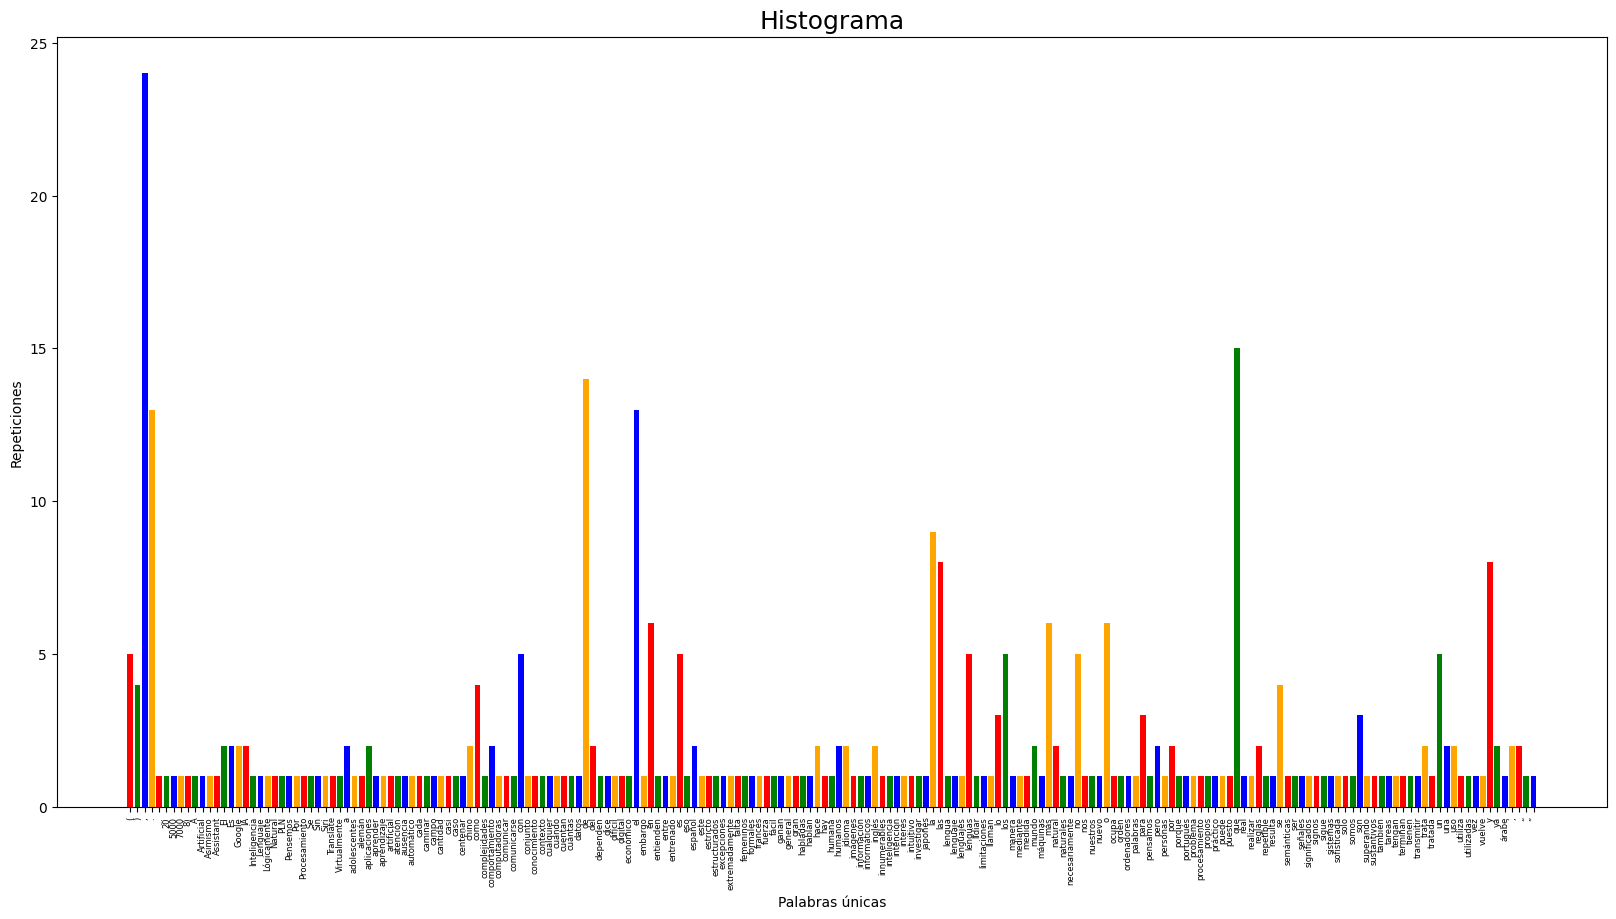

In [20]:
generar_histograma(bolsa, rep)

## Pipeline de normalización

La secuencia de pasos puede variar según el objetivo del análisis, en este caso se implemento conforme a la lista.
1.   Tokenización
2.   Eliminación de caracteres especiales
3.   Conversión a minúsculas
4.   Eliminación de stopwords
5.   POS-tagging
6.   Lematización
7.   Normalización de acentos (español)
8.   Stemming

In [21]:
#Procesamiento del texto
doc = nlp(texto)
# 1. Tokenizar y 2. eliminar caracteres especiales(dejando acentos)
tokenizar = [token.text for token in doc if token.text.isalpha() or token.text.isdigit()]
#Cargar las stopwords por default de spacy
stopwords = nlp.Defaults.stop_words
# 3. Quitar stopwords
# token.lower() pasa las palabras a minusculas
filtrado = [token for token in tokenizar if token.lower() not in stopwords]

# 4. Etiquetado gramatical implicito con spacy al lematizar
lematizado = []
for token in doc:
    if token.text.lower() in filtrado:
        # 5. Lematización
        if opcion == 2: #En caso que se procese el idioma español
            # 5.5. Quitar acentos con unidecode
            lematizado.append(unidecode.unidecode(token.lemma_))
        else:
            lematizado.append(token.lemma_)

# 6. Aplicar stemming y guardarlos en stemmed
stemmed = [stemmer.stem(palabra) for palabra in lematizado]


In [22]:
total = len(stemmed)
print(f"Numero total de palabras: {total}")

Numero total de palabras: 126


In [23]:
#Obtener palabras unicas y sus repeticiones
[bolsa, rep] = encontrarUnicasyRepeticiones(stemmed)

unicos = len(bolsa)
print(f"Numero total de palabras únicas: {unicos}")

Numero total de palabras únicas: 101


In [24]:
#Obtiene los indices de las palabras
indicesMenos = palabrasMenosComunes(rep)
indicesMas = palabrasComunes(rep)

# Imprimir las 10 palabras menos probables y las 10 más probables
print("Palabras menos probables:")
imprime(indicesMenos, bolsa)
print("\nPalabras más probables:")
imprime(indicesMas, bolsa)

Palabras menos probables:
20
5000
7000
adolescent
alem
aprend
aprendizaj
arab
atencion
ausenci

Palabras más probables:
lengu
natural
human
lenguaj
aplic
artificial
chin
comport
espanol
idiom


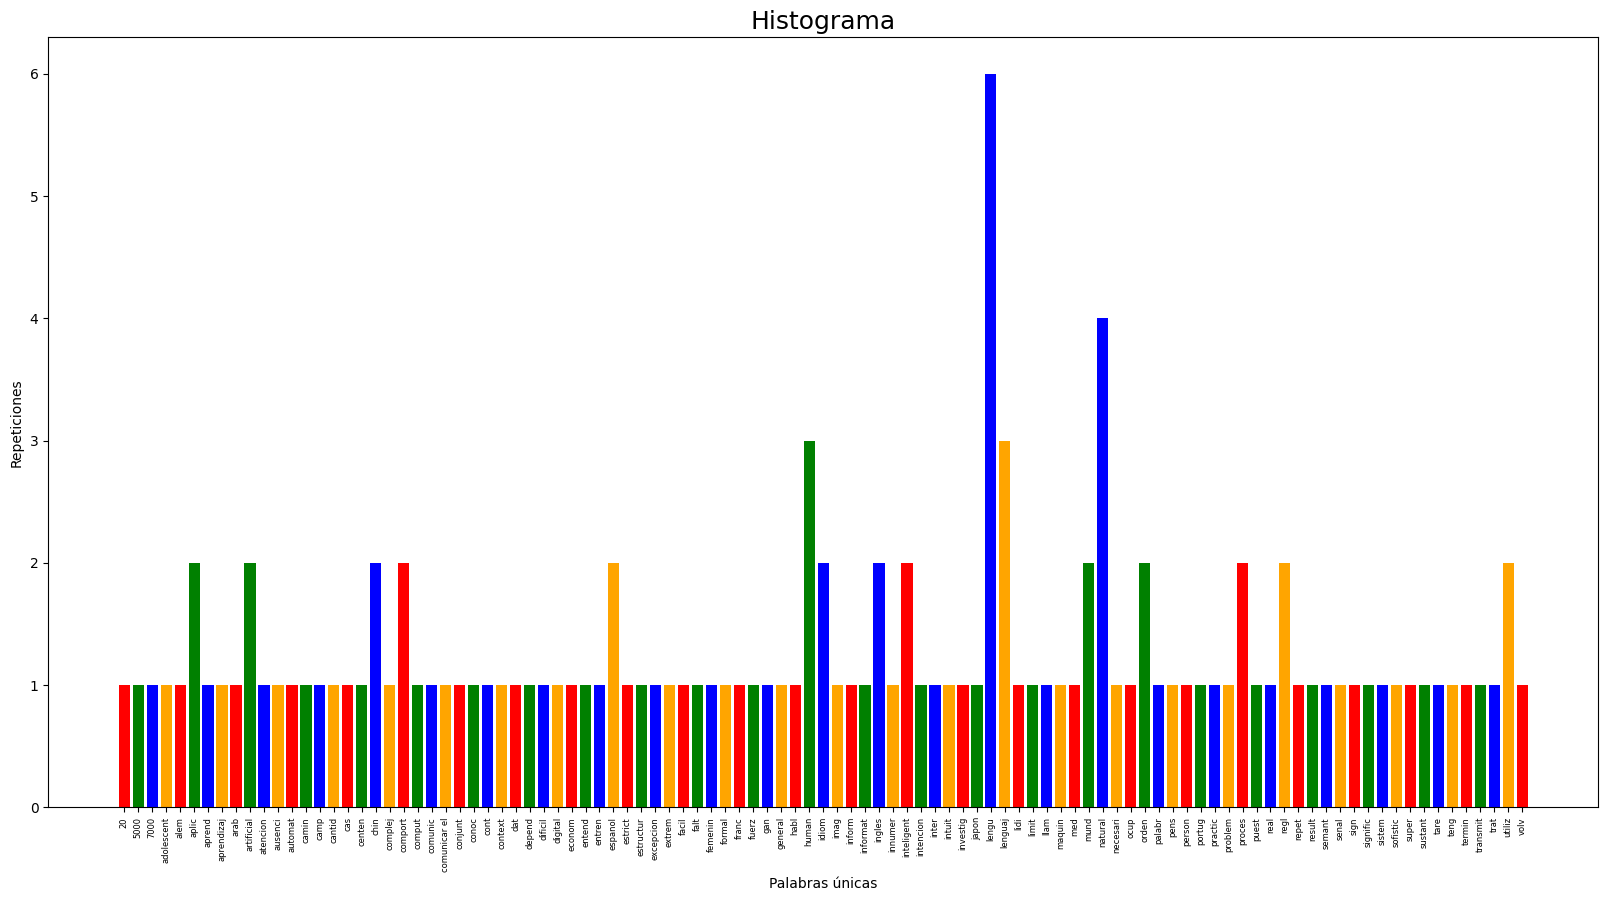

In [25]:
generar_histograma(bolsa, rep)

Después de aplicar la normalización, se observó una reducción significativa de palabras irrelevantes tanto en inglés como en español, obteniendo representaciones más compactas y semánticamente consistentes del texto.

## Conclusión
Este proyecto demuestra la importancia del preprocesamiento en NLP para mejorar la calidad de los datos antes de tareas de análisis o modelado. La combinación adecuada de técnicas depende del objetivo final, y el pipeline propuesto puede adaptarse a distintos tipos de texto incorporando pasos adicionales como corrección ortográfica o eliminación de emojis.